In [143]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [144]:
data = pd.read_csv('shopping_trends_updated.csv')
data.head(n = 5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [145]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [146]:
num = ["Review Rating","Age","Purchase Amount (USD)","Previous Purchases"]

In [147]:
data[num].describe()

,Review Rating,Age,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,3.749949,44.068462,59.764359,25.351538
std,0.716223,15.207589,23.685392,14.447125
min,2.500000,18.000000,20.000000,1.000000
25%,3.100000,31.000000,39.000000,13.000000
50%,3.700000,44.000000,60.000000,25.000000
75%,4.400000,57.000000,81.000000,38.000000
max,5.000000,70.000000,100.000000,50.000000


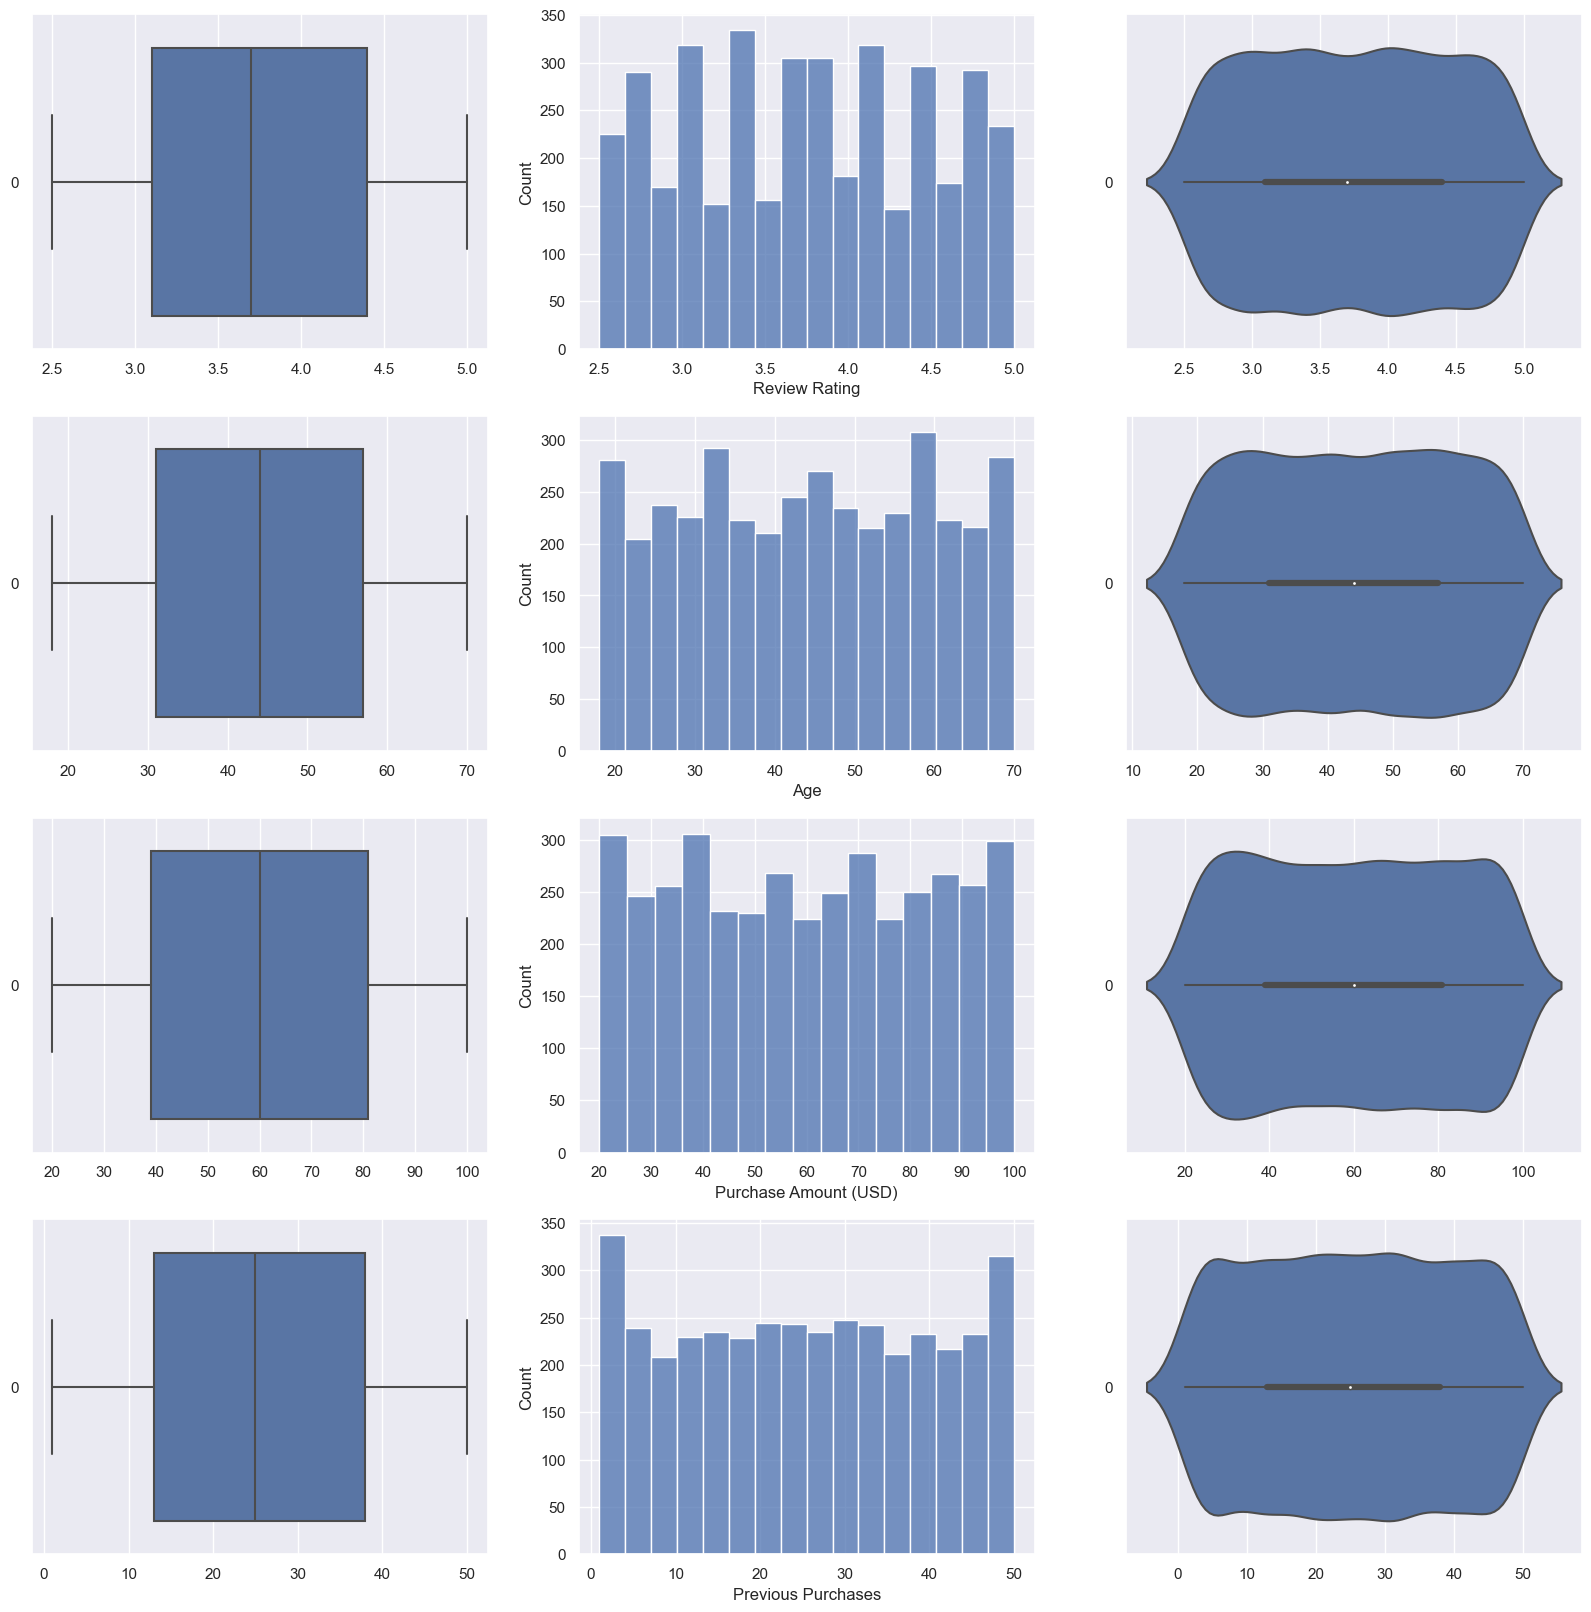

In [148]:
# Draw boxplot, histplot and violinplot of Review rate, Age, Purchase Amount(USD) and Runtime
f, axes = plt.subplots(4, 3, figsize=(20, 20))

count = 0
for i in num:
    sb.boxplot(data =data[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = data[i], ax = axes[count,1])
    sb.violinplot(data = data[i], orient = "h", ax = axes[count,2])
    count += 1

In [149]:
#Check importance of numeric features in  predicting Review rate

In [150]:
Feature_df = data[["Review Rating","Age","Purchase Amount (USD)","Previous Purchases","Item Purchased"]]
data_encoded = pd.get_dummies(data, columns=['Category'])
data_encoded.head()

,Customer ID,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear
0,1,55,Male,Blouse,53,Kentucky,L,Gray,Winter,3.1,...,Express,Yes,Yes,14,Venmo,Fortnightly,False,True,False,False
1,2,19,Male,Sweater,64,Maine,L,Maroon,Winter,3.1,...,Express,Yes,Yes,2,Cash,Fortnightly,False,True,False,False
2,3,50,Male,Jeans,73,Massachusetts,S,Maroon,Spring,3.1,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,False,True,False,False
3,4,21,Male,Sandals,90,Rhode Island,M,Maroon,Spring,3.5,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,False,False,True,False
4,5,45,Male,Blouse,49,Oregon,M,Turquoise,Spring,2.7,...,Free Shipping,Yes,Yes,31,PayPal,Annually,False,True,False,False


In [186]:
#Preparation of Data Frames
X = data[["Age", "Gender", "Category", "Location", "Size", "Color","Season","Subscription Status","Discount Applied","Frequency of Purchases","Item Purchased","Purchase Amount (USD)","Previous Purchases"]]
Y = data["Review Rating"]

Z = data[["Age", "Gender", "Category", "Location", "Size", "Color","Season","Subscription Status","Discount Applied","Frequency of Purchases","Item Purchased","Purchase Amount (USD)","Previous Purchases"]]
#Creating Dummy Variables for Categorical Variables 
X = pd.get_dummies(data=X, drop_first=False)
Z = pd.get_dummies(data=Z, drop_first=False)


index_list = data['Customer ID'].tolist()
column_values = pd.Series(index_list)
Z.insert(loc=0, column='Customer ID', value=column_values)


ColumnList =(X.columns.values.tolist())

In [152]:
a = data["Review Rating"]
Review_Rating_List = []
for i in data["Review Rating"]:
    if i >= 3.75:               # Mark good purchase experience with '1' if ReviewRating >= 3.75
        Review_Rating_List.append(1) 
    else:                      # Mark bad purchase experience with '1' if ReviewRating < 3.75
        Review_Rating_List.append(0)


X_train, X_test, y_train, y_test = train_test_split(X, Review_Rating_List, test_size = 0.2)

In [153]:
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train) 
accuracy_rf = random_forest.score(X_train, y_train) * 100
print(accuracy_rf, "%")

98.17307692307692 %


In [154]:
#K-fold Cross Validation to check how good is random forest performance
rf = RandomForestClassifier(n_estimators = 10)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.52884615 0.53525641 0.51282051 0.46474359 0.47435897 0.53525641
 0.52564103 0.46794872 0.53205128 0.50320513]
Mean: 0.5080128205128205
Standard Deviation: 0.027318900432512866


In [155]:
importance = pd.DataFrame({"Feature": X_train.columns, "Importance": random_forest.feature_importances_})
importance = importance.sort_values("Importance", ascending = False).set_index("Feature")

In [156]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest.feature_importances_
})

# Sum the importance of one-hot features for each original feature
original_feature_importances = feature_importance_df.copy()
original_feature_importances['OriginalFeature'] = feature_importance_df['Feature'].str.split('_').str[0]  # assuming default pd.get_dummies() encoding
original_feature_importances = original_feature_importances.groupby('OriginalFeature').agg({'Importance': 'sum'}).reset_index()

# Sort by importance
original_feature_importances = original_feature_importances.sort_values(by='Importance', ascending=False)

In [157]:
original_feature_importances.head(10)

,OriginalFeature,Importance
7,Location,0.199286
2,Color,0.156294
6,Item Purchased,0.130893
9,Purchase Amount (USD),0.085552
0,Age,0.080827
8,Previous Purchases,0.078095
4,Frequency of Purchases,0.075965
11,Size,0.050534
10,Season,0.048544
1,Category,0.035166


In [158]:
#From the importance score, we can see that Location is the most important numeric feature in predicting Review rate

In [159]:
#Random Forest Regression

In [160]:
random_forest = RandomForestRegressor() 
X_train, X_test, y_train, y_test = train_test_split(X, a, test_size = 0.2)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [161]:
rf_tuning = RandomForestRegressor(random_state = 20)
param_grid = {
   'n_estimators': [20, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6,7],
   'criterion' :['squared_error', 'absolute_error']
}


In [162]:
#Take Note, GSCV will take long time to fit the model

In [163]:
GSCV = GridSearchCV(estimator = rf_tuning, param_grid = param_grid, cv = 4)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 100}

In [164]:
#try cv = 4 see got any improvement or not

In [165]:
random_forest = RandomForestRegressor(random_state = 20)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Mean Absolute Error (MAE): ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', sklearn.metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error (MAE):  0.6409076923076923
Mean Squared Error (MSE):  0.553605441025641


In [166]:
random_forest_out_of_bag = RandomForestRegressor(oob_score = True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

-0.03799355841511165


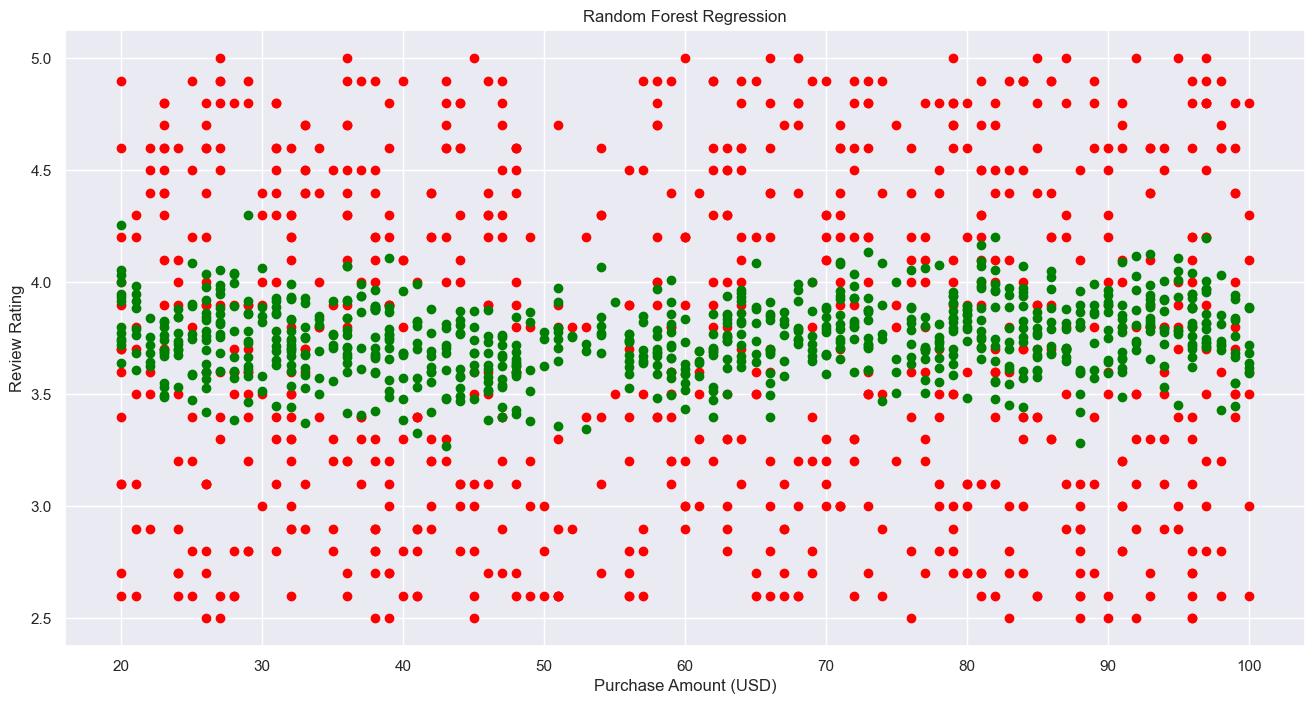

In [167]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Purchase Amount (USD)'].values, y_test, color = 'red')
plt.scatter(X_test['Purchase Amount (USD)'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()

In [193]:
# List of Customer IDs you are interested in
customer_ids = [30, 45, 60, 369, 500]

# Extract rows where 'Customer ID' is in customer_ids list
data_pred = Z[Z["Customer ID"].isin(customer_ids)]

# Display the extracted DataFrame
data_pred

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
29,30,31,48,14,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
44,45,39,53,45,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,60,63,79,4,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
368,369,24,39,29,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
499,500,36,99,24,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [194]:
X_pred = pd.DataFrame(data_pred[ColumnList])



predictions = random_forest.predict(X_pred)
predictions

array([4.005, 4.302, 3.938, 4.306, 4.506])

In [195]:
data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]

# add the predictions and summarize
predictions = pd.DataFrame(predictions, columns=["Pred_Review Rating"], index=data_pred.index)
data_acc = pd.concat([data_pred[["Customer ID", "Review Rating"]], predictions], axis=1)

print(data_acc)

     Customer ID  Review Rating  Pred_Review Rating
29            30            4.1               4.005
44            45            4.6               4.302
59            60            4.6               3.938
368          369            4.5               4.306
499          500            4.8               4.506


C:\Users\user\AppData\Local\Temp\ipykernel_34424\3367623933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]


In [196]:
data_acc

,Customer ID,Review Rating,Pred_Review Rating
29,30,4.1,4.005
44,45,4.6,4.302
59,60,4.6,3.938
368,369,4.5,4.306
499,500,4.8,4.506


In [197]:
# Calculate the percentage errors
review_rating_errors = 100 * abs(data_acc["Review Rating"] - data_acc["Pred_Review Rating"]) / data_acc["Review Rating"]
review_rating_errors = pd.DataFrame(review_rating_errors, columns=["Error"], index=data_acc.index)

# Concatenate the error dataframe with the main dataframe
data_acc = pd.concat([data_acc, review_rating_errors], axis=1)

# Display the final DataFrame with the errors
print(data_acc)

     Customer ID  Review Rating  Pred_Review Rating      Error
29            30            4.1               4.005   2.317073
44            45            4.6               4.302   6.478261
59            60            4.6               3.938  14.391304
368          369            4.5               4.306   4.311111
499          500            4.8               4.506   6.125000
